<h1>Preprocessing Site Names<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
        <span><a href="#Packages-and-functions" data-toc-modified-id="Packages-and-functions-1">
        <span class="toc-item-num">1&nbsp;&nbsp;</span>Packages and functions</a></span>
        </li>
        <li>
            <span><a href="#Prepare-and-match-admin-boundary-data" data-toc-modified-id="Prepare-and-match-admin-boundary-data-2">
            <span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare and match admin boundary data</a></span>
            <ul class="toc-item">
                <li>
                <span><a href="#Match-health-list-admin-names-to-shapefile-admin-names" data-toc-modified-id="Match-health-list-admin-names-to-shapefile-admin-names-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Match health list admin names to shapefile admin names</a></span>
                <ul class="toc-item">
                <li>
                <span><a href="#Match-orgunitlevel4-to-Geob-Adm-3" data-toc-modified-id="Match-orgunitlevel4-to-Geob-Adm-3-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Match orgunitlevel4 to Geob Adm 3</a></span>
                </li>
                <li>
                <span><a href="#Match-orgunitlevel3-to-Geob-Adm-2" data-toc-modified-id="Match-orgunitlevel3-to-Geob-Adm-2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Match orgunitlevel3 to Geob Adm 2</a></span>
                </li>
                <li>
                <span><a href="#Match-orgunitlevel2-to-Geob-Adm-1" data-toc-modified-id="Match-orgunitlevel2-to-Geob-Adm-1-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Match orgunitlevel2 to Geob Adm 1</a></span>
                </li>
                </ul>
            </li>
        </ul>
    </li>
</div>

Version: April 11, 2023

This notebook works with health facilities from the HMIS Database and attempts to geolocate them, by joining them to administrative shapefiles, other sources of geo-located health facilities, and running queries with geocoding APIs.

**Data Sources**
- Health facilities (hierarchy list)
- Geoboundaries (Adm1 through 4)
- FEWS Admin-2 boundaries (updated post 2017)

# Packages and functions

In [1]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

# local imports
import preprocessing_utils as ppu
import search_utils as ssu

In [2]:
from ctypes.util import find_library
find_library('c')

'/usr/lib/libc.dylib'

# Prepare and match admin boundary data

In [3]:
iso3 = "NGA"
country = "Nigeria"
input_dir = "/Users/dianaholcomb/Documents/GWU/6501_Capstone/workspace/data"
input_filename = "nigeria2023-04-17.csv"
output_dir = join(input_dir, "output", iso3)
num_admin_levels = 2
num_org_levels = 5
geoboundary_words_to_remove = [" city council", " district council", " municipal council", " district", " Wwrd", " municipal"]
org_level_words_to_remove = [" district",  " local government area", " state", " ward", " township"]
org_level_front_wtr = ["ab", "ad", "ak", "al", "an", "ba", "be", "bo", "by", "cr", "de", "eb", "ed", "ek",
                       "en", "fc", "go", "im", "jg", "ji", "kd", "ke", "kn", "ko", "kt", "kw", "la", "na",
                       "ni", "og", "on", "os", "oy", "pl", "ri", "so", "ta", "yo", "za"]
check_dupe_cols = ['orgunitlevel2', 'orgunitlevel3', 'orgunitlevel4']

In [4]:
geob_arr = ppu.get_geoboundaries(num_admin_levels, iso3)

In [5]:
master_table = ppu.process_masterDF(input_dir, input_filename, num_org_levels, check_dupe_cols=check_dupe_cols)
#master_table.to_csv(f"{input_dir}/temp_{iso3}_clean.csv")

Len of original data: 2490068
Len of clean data: 8990

Unique Level 2: 38
Unique Level 3: 771
Unique Level 4: 8936
Unique Level 5: 8932


In [6]:
geobList_arr = []
for idx, geob in enumerate(geob_arr):
    admIdx = idx+1
    print(f"Unique Geoboundaries Adm {admIdx}: {len(geob)}")
    geob_list = list(geob.shapeName)
    geob_list.sort()
    print(geob_list)
    geobList_arr.append(geob_list)

Unique Geoboundaries Adm 1: 37
['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Fct', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara']
Unique Geoboundaries Adm 2: 774
['Aba North', 'Aba South', 'Abadam', 'Abaji', 'Abak', 'Abakaliki', 'Abeokuta North', 'Abeokuta South', 'Abi', 'Aboh-Mbaise', 'Abua/Odual', 'Abuja Municipal', 'Adavi', 'Ado', 'Ado Ekiti', 'Ado-Odo/Ota', 'Afijio', 'Afikpo North', 'Afikpo South', 'Agaie', 'Agatu', 'Agege', 'Aguata', 'Agwara', 'Ahiazu-Mbaise', 'Ahoada East', 'Ahoada West', 'Aiyedade', 'Aiyedire', 'Aiyekire (Gbonyin)', 'Ajaokuta', 'Ajeromi-Ifelodun', 'Ajingi', 'Akamkpa', 'Akinyele', 'Akko', 'Akoko North East', 'Akoko North West', 'Akoko South East', 'Akoko South West', 'Akoko-Edo', 'Akpabuyo', 'Akuku Toru', 'Akure Nor

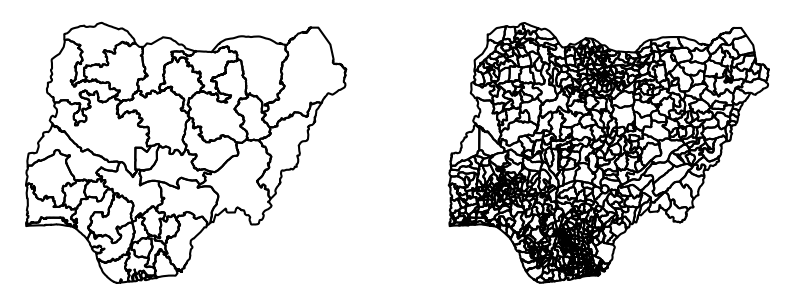

In [7]:
fig, ax = plt.subplots(1, num_admin_levels, figsize=(10,10))
for idx, geob in enumerate(geob_arr):
    geob.boundary.plot(ax=ax[idx], color='black').set_axis_off()

## Match health list admin names to shapefile admin names
### Match highest Geob Adm to orgunitlevel
Try using fuzzy matching

In [8]:
def addMatches(row, orglvl_col_name, adm_col_name, matchesSubsetDF):
    #print(matchesSubsetDF.info())
    if orglvl_col_name in row.index.values and adm_col_name in row.index.values and pd.notna(row[adm_col_name]) and len(row[adm_col_name]) > 0:
        #print(f"Row: {row.name} keeping orig [{row.adm_col_name}]")
        return [row[orglvl_col_name], row[adm_col_name]]

        #master_table_copy[master_table_copy['organisationunitid'] == "nTZmDCTxF5J"][['orgunitlevel4_edit', 'adm2']]

    elif row.organisationunitid in matchesSubsetDF['organisationunitid'].values:

        the_match = list(matchesSubsetDF[matchesSubsetDF['organisationunitid'] == row.organisationunitid][[orglvl_col_name, adm_col_name]].values[0])

        #print(f"Row: {row.name} adding from matchesSubsetDF [{the_match}]")
        return the_match
    else:
        #print(f"Row: {row.name} returning [None]")
        return ["", ""]

In [9]:
curr_geob_lvl = num_admin_levels
curr_org_lvl = 4
master_table_copy = master_table.copy(deep=True)

for geobIdx in range(num_admin_levels-1, -1, -1): # reverse loop
    print(f"-----Master list level: {curr_org_lvl}, Geoboundaries level: {curr_geob_lvl}-----")

    master_table_copy.loc[:, f"orgunitlevel{curr_org_lvl}_edit"] = master_table_copy[f"orgunitlevel{curr_org_lvl}"].str.lower()

    geob_list = ppu.remove_words(geob_arr[geobIdx], "shapeName", geoboundary_words_to_remove)


    master_table_copy = ppu.remove_words_df(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit", org_level_words_to_remove)
    master_table_copy = ppu.remove_from_front_df(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit",
                                                 words_to_remove=org_level_front_wtr)

    org_lvl_list = ppu.remove_words(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit", org_level_words_to_remove)
    org_lvl_list = ppu.remove_from_front(org_lvl_list, words_to_remove=org_level_front_wtr)

    # Print names to inspect
    #print(org_lvl_list)
    #print(geob_list)
    #ppu.inspect_level_names(curr_org_lvl, org_lvl_list, curr_geob_lvl, geobList_arr[geobIdx])

    table_adm_matches = ssu.find_matches(org_lvl_list.tolist(), geob_list.tolist(), 90, curr_org_lvl, curr_geob_lvl)
    matches_pct = (len(table_adm_matches) / len(org_lvl_list))
    print('Matches for Org level {}, Geob level {}: {:.2f}%'.format(curr_org_lvl, curr_geob_lvl, matches_pct*100))
    print('table_adm_matches:')
    print(table_adm_matches)
    # Loop through each row in master table, and add new attribute names (adm3 and adm2), if the names produced
    # matches in the lookup tables

    for idx, row in master_table_copy.iterrows():
        if row[f"orgunitlevel{curr_org_lvl}_edit"] in list(table_adm_matches[f"name_level{curr_org_lvl}"]):
            match = table_adm_matches.loc[table_adm_matches[f"name_level{curr_org_lvl}"] == row[f"orgunitlevel{curr_org_lvl}_edit"], f"name_geob{curr_geob_lvl}"].iloc[0]
            #print(f"MAtch: {match}")
            master_table_copy.loc[idx, f'adm{curr_geob_lvl}'] = match



    if f"adm{curr_geob_lvl}" in master_table_copy.columns:
        notFound = master_table_copy[f"adm{curr_geob_lvl}"].isna().sum()
        print(f"Num not found: {notFound}")

    master_table[[f"orgunitlevel{curr_org_lvl}_edit",
                 f'adm{curr_geob_lvl}']] = master_table.apply(lambda x: addMatches(x, f"orgunitlevel{curr_org_lvl}_edit",
                                                                                  f'adm{curr_geob_lvl}', master_table_copy),
                                                              axis=1,
                                                              result_type="expand")
    #print("Matches 80% or less:")
    #print(table_adm_matches.loc[table_adm_matches.score<=80])

    # iterate down
    curr_geob_lvl -= 1
    curr_org_lvl -= 1
    print("------------------------------------------")


-----Master list level: 4, Geoboundaries level: 2-----
Matches for Org level 4, Geob level 2: 6.88%
table_adm_matches:
       name_level4  name_geob2  score
67            abbi         abi    100
79           abigi       abaji    100
90           aboke        abak    100
101   abua/odual 1  abua/odual     91
106   abua/odual 2  abua/odual     91
...            ...         ...    ...
8538      yunusari    yunusari    100
8539      yusufari    yusufari    100
8568         zango       zango    100
8597          zing        zing    100
8600         zobwo      sabuwa    100

[594 rows x 3 columns]
Num not found: 8034
------------------------------------------
-----Master list level: 3, Geoboundaries level: 1-----
Matches for Org level 3, Geob level 1: 2.23%
table_adm_matches:
    name_level3 name_geob1  score
7           abi       abia    100
95       bauchi     bauchi    100
119       bonny      benue    100
168      ebonyi     ebonyi    100
172         edu        edo    100
180        eket

In [10]:
master_table[master_table['organisationunitid'] == "xBa9XtuqgWT"]


,index,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,orgunitlevel5,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,orgunitlevel4_edit,adm2,orgunitlevel3_edit,adm1
0,0,ng Federal Government,ab Abia State,ab Ugwunagbo Local Government Area,ab Obeaja Ward,ab 0susu-Aku Health Post,xBa9XtuqgWT,ab 0susu-Aku Health Post,61977087.0,NaN,obeaja,NaN,ugwunagbo,NaN


In [11]:
print(master_table.head())

   index          orgunitlevel1  orgunitlevel2  \
0      0  ng Federal Government  ab Abia State   
1      2  ng Federal Government  ab Abia State   
2      3  ng Federal Government  ab Abia State   
3      5  ng Federal Government  ab Abia State   
4      7  ng Federal Government  ab Abia State   

                        orgunitlevel3        orgunitlevel4  \
0  ab Ugwunagbo Local Government Area       ab Obeaja Ward   
1     ab Ohafia Local Government Area      ab Ebemoha Ward   
2  ab Ukwa West Local Government Area     ab Oza-West Ward   
3  ab Ukwa West Local Government Area  ab Oza-Ukwu Ward II   
4  ab Ukwa West Local Government Area     ab Ipu East Ward   

                  orgunitlevel5 organisationunitid  \
0     ab 0susu-Aku  Health Post        xBa9XtuqgWT   
1      ab 14 Bdb Medical Centre        BOunNtvsHZm   
2   ab ab Ikpokwu Health center        kKmG3qVjUUV   
3  ab ab Isalanteke Health post        BdbRDSlOFYV   
4         ab ab Ngozi Maternity        qwB7H8FTxx2   

 

In [12]:
curr_geob_lvl = num_admin_levels
curr_org_lvl = 3
master_table_copy = master_table.copy(deep=True)

for geobIdx in range(num_admin_levels-1, -1, -1): # reverse loop
    print(f"-----Master list level: {curr_org_lvl}, Geoboundaries level: {curr_geob_lvl}-----")

    master_table_copy.loc[:, f"orgunitlevel{curr_org_lvl}_edit"] = master_table_copy[f"orgunitlevel{curr_org_lvl}"]

    geob_list = ppu.remove_words(geob_arr[geobIdx], "shapeName", geoboundary_words_to_remove)

    master_table_copy = ppu.remove_words_df(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit", org_level_words_to_remove)
    master_table_copy = ppu.remove_from_front_df(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit",
                                                 words_to_remove=org_level_front_wtr)

    org_lvl_list = ppu.remove_words(master_table_copy, f"orgunitlevel{curr_org_lvl}_edit", org_level_words_to_remove)
    org_lvl_list = ppu.remove_from_front(org_lvl_list, words_to_remove=org_level_front_wtr)

    # Print names to inspect
    #print(org_lvl_list)
    #print(geob_list)
    #ppu.inspect_level_names(curr_org_lvl, org_lvl_list, curr_geob_lvl, geobList_arr[geobIdx])

    table_adm_matches = ssu.find_matches(org_lvl_list.tolist(), geob_list.tolist(), 90, curr_org_lvl, curr_geob_lvl)
    matches_pct = (len(table_adm_matches) / len(org_lvl_list))
    print('Matches for Org level {}, Geob level {}: {:.2f}%'.format(curr_org_lvl, curr_geob_lvl, matches_pct*100))

    print('table_adm_matches:')
    print(table_adm_matches)

    # Loop through each row in master table, and add new attribute names (adm3 and adm2), if the names produced
    # matches in the lookup tables
    for idx, row in master_table_copy.iterrows():
        if row[f"orgunitlevel{curr_org_lvl}_edit"] in list(table_adm_matches[f"name_level{curr_org_lvl}"]):
            match = table_adm_matches.loc[table_adm_matches[f"name_level{curr_org_lvl}"] == row[f"orgunitlevel{curr_org_lvl}_edit"], f"name_geob{curr_geob_lvl}"].iloc[0]
            master_table_copy.loc[idx, f'adm{curr_geob_lvl}'] = match

    if f"adm{curr_geob_lvl}" in master_table_copy.columns:
        notFound = master_table_copy[f"adm{curr_geob_lvl}"].isna().sum()
        print(f"Num not found: {notFound}")
    else:
        print("Num not found: 0")

    #print("Matches 80% or less:")
    #print(table_adm_matches.loc[table_adm_matches.score<=80])

    master_table[[f"orgunitlevel{curr_org_lvl}_edit",
                 f'adm{curr_geob_lvl}']] = master_table.apply(lambda x: addMatches(x, f"orgunitlevel{curr_org_lvl}_edit",
                                                                                  f'adm{curr_geob_lvl}', master_table_copy),
                                                              axis=1,
                                                              result_type="expand")

    # iterate down
    curr_geob_lvl -= 1
    curr_org_lvl -= 1
    print("------------------------------------------")


-----Master list level: 3, Geoboundaries level: 2-----
Matches for Org level 3, Geob level 2: 98.04%
table_adm_matches:
    name_level3 name_geob2  score
0     aba north  aba north    100
1     aba south  aba south    100
2         abaji      abaji    100
3          abak       abak    100
4     abakaliki  abakaliki    100
..          ...        ...    ...
758       zango      zango    100
760       zaria      zaria    100
761        zing       zing    100
762       zurmi      zurmi    100
763        zuru       zuru    100

[749 rows x 3 columns]
Num not found: 14
------------------------------------------
-----Master list level: 2, Geoboundaries level: 1-----
Matches for Org level 2, Geob level 1: 97.30%
table_adm_matches:
    name_level2   name_geob1  score
0          abia         abia    100
1       adamawa      adamawa    100
2     akwa-ibom    akwa ibom    100
3       anambra      anambra    100
4        bauchi       bauchi    100
5       bayelsa      bayelsa    100
6         benue

In [13]:
print(master_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        8990 non-null   int64  
 1   orgunitlevel1                8990 non-null   object 
 2   orgunitlevel2                8989 non-null   object 
 3   orgunitlevel3                8989 non-null   object 
 4   orgunitlevel4                8989 non-null   object 
 5   orgunitlevel5                8989 non-null   object 
 6   organisationunitid           8989 non-null   object 
 7   organisationunitname         8989 non-null   object 
 8   organisationunitcode         8811 non-null   float64
 9   organisationunitdescription  0 non-null      float64
 10  orgunitlevel4_edit           8990 non-null   object 
 11  adm2                         8976 non-null   object 
 12  orgunitlevel3_edit           8990 non-null   object 
 13  adm1              

In [14]:
master_table.to_csv(f"{input_dir}/preprocess_{iso3}_matches.csv")